In [1]:
import datetime
print("Current Date/Time: ", datetime.datetime.now())
# colab is in utc timezone, so below time + 5hr30 min = IST

Current Date/Time:  2021-02-06 12:16:42.102115


In [2]:
!git clone https://github.com/namanshrimali/simplif-ai.git
!pip install -U albumentations
%cd simplif-ai
%matplotlib inline 

fatal: destination path 'simplif-ai' already exists and is not an empty directory.
Requirement already up-to-date: albumentations in /usr/local/lib/python3.6/dist-packages (0.5.2)
/content/simplif-ai


In [3]:
from util.devices import find_device
from data_action.data_loader import *
from util.image_plot import plot_images
from learning.train import train
from learning.validate import test
from util.mean_std_calc import calc_mean_std
from util.graph_plot import plot_me
from quiz_dnn import *

In [4]:
device = find_device()
batch_size = 100
dataset = 'CIFAR10' 

mean, std = calc_mean_std(dataset) # calculates mean and standard deviation of the dataset

data_loader = Data_Loader(device, batch_size, dataset = dataset, mean = mean, std = std, transform_type='mmda')

trainloader = data_loader.load_training_data()
testloader = data_loader.load_testing_data()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device: cuda



Extracting data/cifar-10-python.tar.gz to data
Mean: [0.49139884 0.48215783 0.44653153], Std: [0.20230089 0.19941294 0.200962  ]
Loading training data. Dataset: CIFAR10
Files already downloaded and verified
Training data loaded

Loading testing data.
Files already downloaded and verified
Test data loaded



In [5]:
model = QuizDnn().to(device)

In [6]:
!pip install torchsummary
from torchsummary import summary

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 64, 16, 16]          36,928
             ReLU-11           [-1, 64, 16, 16]               0
      BatchNorm2d-12           [-1, 64, 16, 16]             128
          Dropout-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1, 64,

/content/simplif-ai/quiz_dnn.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [7]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

train_loss = [] 
train_accuracy = []
test_loss = []
test_accuracy = []


optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
scheduler = StepLR(optimizer, step_size= 8, gamma= 0.5, verbose = True)

for epoch in range(20):  # loop over the dataset multiple times
    misclassified = []
    print(f'Epoch: {epoch+1}')
    train(model, device, trainloader, train_loss, train_accuracy, optimizer)
    test(model, device, testloader, test_loss, test_accuracy, misclassified)
    scheduler.step()

  0%|          | 0/500 [00:00<?, ?it/s]/content/simplif-ai/quiz_dnn.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
loss=2.301487684249878 batch_id=0:   0%|          | 1/500 [00:00<01:00,  8.20it/s]

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 1


loss=1.3574687242507935 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.71it/s]


\Train set: Accuracy: 18830/50000 (37.6600%)



loss=1.4041346311569214 batch_id=1:   0%|          | 2/500 [00:00<00:40, 12.27it/s]


Test set: Average loss: 1.4108, Accuracy: 5079/10000 (50.79%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 2


loss=1.2502055168151855 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.67it/s]


\Train set: Accuracy: 26907/50000 (53.8140%)



loss=1.1587274074554443 batch_id=1:   0%|          | 2/500 [00:00<00:41, 12.04it/s]


Test set: Average loss: 1.0277, Accuracy: 6418/10000 (64.18%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 3


loss=1.1159825325012207 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.72it/s]


\Train set: Accuracy: 30738/50000 (61.4760%)



loss=0.9162479639053345 batch_id=1:   0%|          | 2/500 [00:00<00:42, 11.63it/s]


Test set: Average loss: 0.8623, Accuracy: 7071/10000 (70.71%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 4


loss=0.9341360330581665 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.68it/s]


\Train set: Accuracy: 32972/50000 (65.9440%)



loss=0.9349958896636963 batch_id=1:   0%|          | 2/500 [00:00<00:42, 11.62it/s]


Test set: Average loss: 0.7710, Accuracy: 7328/10000 (73.28%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 5


loss=0.8988379836082458 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.82it/s]


\Train set: Accuracy: 34204/50000 (68.4080%)



loss=0.7305412292480469 batch_id=1:   0%|          | 2/500 [00:00<00:40, 12.16it/s]


Test set: Average loss: 0.6698, Accuracy: 7674/10000 (76.74%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 6


loss=0.7864267826080322 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.80it/s]


\Train set: Accuracy: 35298/50000 (70.5960%)



loss=0.7458749413490295 batch_id=1:   0%|          | 2/500 [00:00<00:41, 12.10it/s]


Test set: Average loss: 0.6653, Accuracy: 7689/10000 (76.89%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 7


loss=0.5852187871932983 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.86it/s]


\Train set: Accuracy: 35966/50000 (71.9320%)



loss=0.7380273938179016 batch_id=1:   0%|          | 2/500 [00:00<00:43, 11.33it/s]


Test set: Average loss: 0.5628, Accuracy: 8089/10000 (80.89%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 8


loss=0.6906738877296448 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.77it/s]


\Train set: Accuracy: 36617/50000 (73.2340%)



loss=0.7582245469093323 batch_id=1:   0%|          | 2/500 [00:00<00:42, 11.66it/s]


Test set: Average loss: 0.5485, Accuracy: 8147/10000 (81.47%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 9


loss=0.5682733654975891 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.71it/s]


\Train set: Accuracy: 37772/50000 (75.5440%)



loss=0.7840709090232849 batch_id=1:   0%|          | 2/500 [00:00<00:41, 12.14it/s]


Test set: Average loss: 0.4985, Accuracy: 8321/10000 (83.21%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 10


loss=0.8334375023841858 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.85it/s]


\Train set: Accuracy: 38350/50000 (76.7000%)



loss=0.5241215229034424 batch_id=1:   0%|          | 2/500 [00:00<00:41, 11.88it/s]


Test set: Average loss: 0.5106, Accuracy: 8219/10000 (82.19%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 11


loss=0.6880629062652588 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.79it/s]


\Train set: Accuracy: 38609/50000 (77.2180%)



loss=0.5602237582206726 batch_id=1:   0%|          | 2/500 [00:00<00:42, 11.70it/s]


Test set: Average loss: 0.4914, Accuracy: 8328/10000 (83.28%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 12


loss=0.8573115468025208 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.80it/s]


\Train set: Accuracy: 38608/50000 (77.2160%)



loss=0.6042380928993225 batch_id=1:   0%|          | 2/500 [00:00<00:42, 11.85it/s]


Test set: Average loss: 0.4678, Accuracy: 8402/10000 (84.02%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 13


loss=0.512150764465332 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.81it/s]


\Train set: Accuracy: 39040/50000 (78.0800%)



loss=0.8335579037666321 batch_id=1:   0%|          | 2/500 [00:00<00:41, 11.91it/s]


Test set: Average loss: 0.4525, Accuracy: 8433/10000 (84.33%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 14


loss=0.8546085357666016 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.78it/s]


\Train set: Accuracy: 39087/50000 (78.1740%)



loss=0.7123095989227295 batch_id=1:   0%|          | 2/500 [00:00<00:43, 11.41it/s]


Test set: Average loss: 0.4405, Accuracy: 8479/10000 (84.79%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 15


loss=0.4400561451911926 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.79it/s]


\Train set: Accuracy: 39211/50000 (78.4220%)



loss=0.5416594743728638 batch_id=1:   0%|          | 2/500 [00:00<00:40, 12.37it/s]


Test set: Average loss: 0.4533, Accuracy: 8434/10000 (84.34%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 16


loss=0.7521621584892273 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.84it/s]


\Train set: Accuracy: 39510/50000 (79.0200%)



loss=0.6128263473510742 batch_id=1:   0%|          | 2/500 [00:00<00:43, 11.53it/s]


Test set: Average loss: 0.4318, Accuracy: 8521/10000 (85.21%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 17


loss=0.6602214574813843 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.74it/s]


\Train set: Accuracy: 40171/50000 (80.3420%)



loss=0.6555052995681763 batch_id=1:   0%|          | 2/500 [00:00<00:41, 11.91it/s]


Test set: Average loss: 0.3974, Accuracy: 8657/10000 (86.57%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 18


loss=0.6915380358695984 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.72it/s]


\Train set: Accuracy: 40284/50000 (80.5680%)



loss=0.7019530534744263 batch_id=1:   0%|          | 2/500 [00:00<00:41, 11.98it/s]


Test set: Average loss: 0.4045, Accuracy: 8618/10000 (86.18%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 19


loss=0.5526840686798096 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.78it/s]


\Train set: Accuracy: 40587/50000 (81.1740%)



loss=0.5485313534736633 batch_id=1:   0%|          | 2/500 [00:00<00:42, 11.78it/s]


Test set: Average loss: 0.4024, Accuracy: 8651/10000 (86.51%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 20


loss=0.5458937287330627 batch_id=499: 100%|██████████| 500/500 [00:42<00:00, 11.83it/s]


\Train set: Accuracy: 40659/50000 (81.3180%)


Test set: Average loss: 0.4059, Accuracy: 8615/10000 (86.15%)

Adjusting learning rate of group 0 to 5.0000e-02.


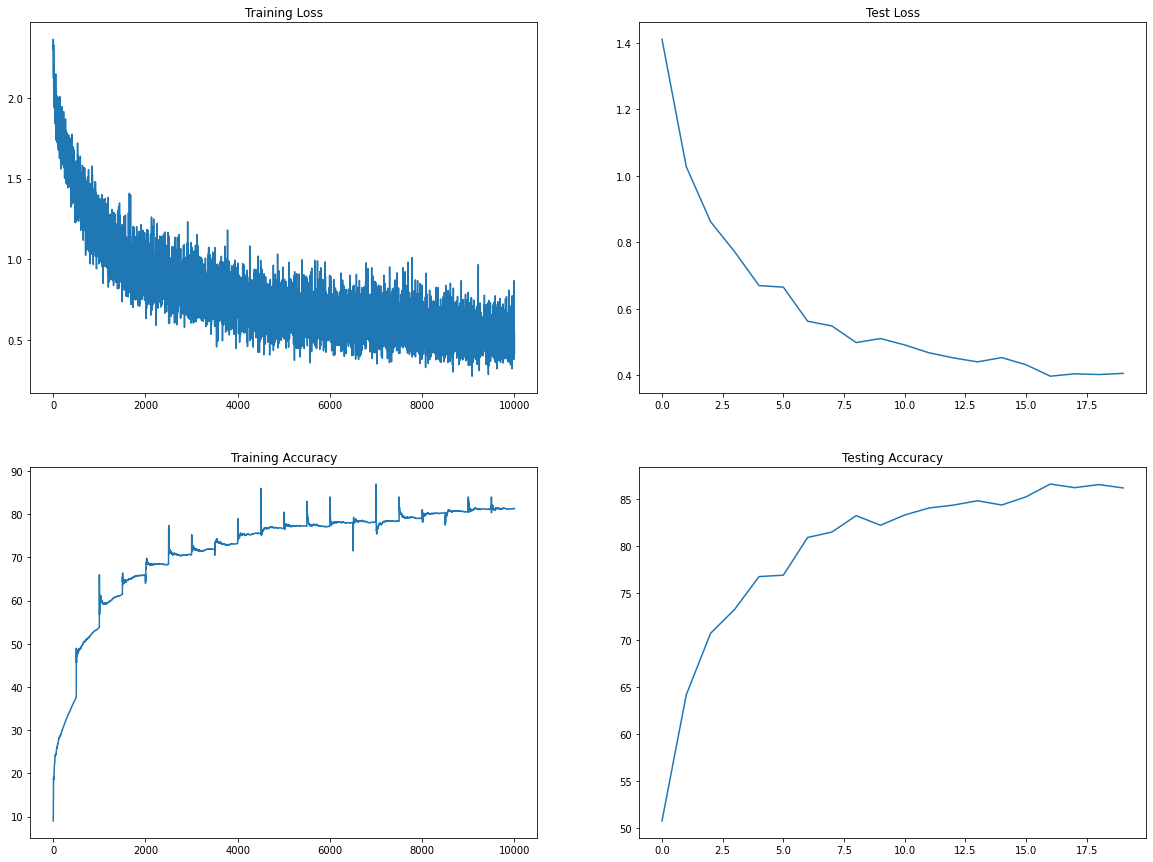

In [8]:
plot_me(train_loss, train_accuracy, test_loss, test_accuracy)